In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
plt.style.use('seaborn-whitegrid')
from sklearn.model_selection import cross_val_score
RANDOM_SEED = 67

In [2]:
data = pd.read_csv('Healthcare_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       5410 non-null   int64  
 1   InscClaimAmtReimbursed           5410 non-null   int64  
 2   DeductibleAmtPaid                5410 non-null   float64
 3   RenalDiseaseIndicator            5410 non-null   int64  
 4   AttendingPhysician               5410 non-null   int64  
 5   OperatingPhysician               5410 non-null   int64  
 6   OtherPhysician                   5410 non-null   int64  
 7   AdmitForDays                     5410 non-null   float64
 8   ChronicCond_Alzheimer            5410 non-null   int64  
 9   ChronicCond_Heartfailure         5410 non-null   int64  
 10  ChronicCond_Cancer               5410 non-null   int64  
 11  ChronicCond_KidneyDisease        5410 non-null   int64  
 12  ChronicCond_ObstrPul

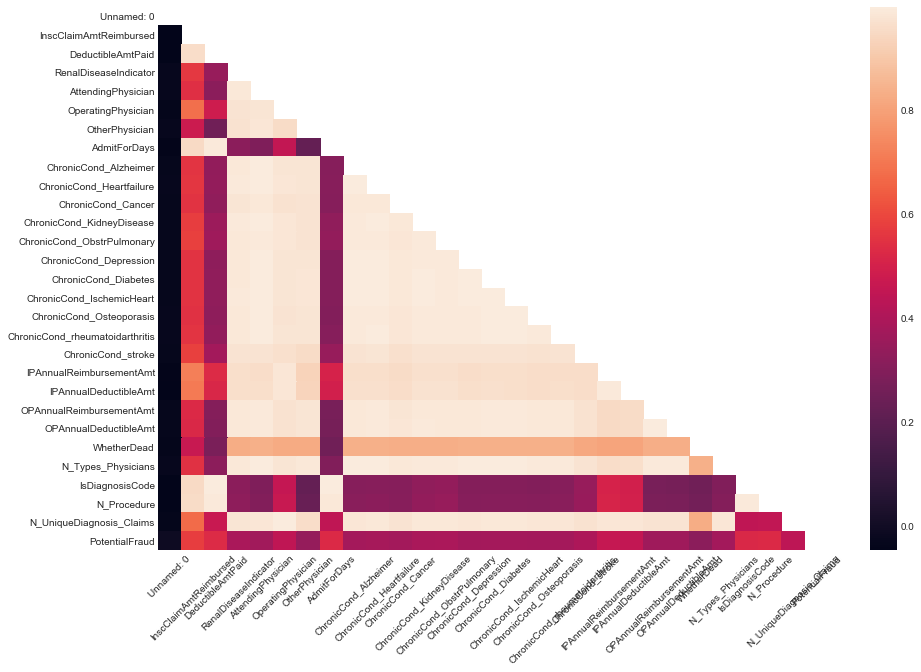

In [3]:
plt.figure(figsize=(15,10)) 
mask = np.triu(np.ones_like(data.corr()))
dataplot = sns.heatmap(data.corr(), mask=mask)
plt.xticks(rotation=45)
plt.show()

In [4]:
X = data.drop("PotentialFraud",axis=1)
y = data.PotentialFraud

In [5]:
(data[data['PotentialFraud']==1].shape[0],
data[data['PotentialFraud']==0].shape[0])

(506, 4904)

# Как работают без улучшений

# SVM with SGD



In [6]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = RANDOM_SEED)


In [7]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss = 'squared_hinge',penalty = 'elasticnet',class_weight = {0:0.25,1:0.75},random_state = RANDOM_SEED)
model.fit(X_train,y_train)

y_predict = model.predict(X_train)


print('Для тренировочных данных')
print(f'Accuracy: {metrics.accuracy_score(y_train,y_predict):2}')
print(f'F1-Score: {metrics.f1_score(y_train, y_predict):2}')
print(f'ROC_AUC: {metrics.roc_auc_score(y_train,y_predict)}')


Для тренировочных данных
Accuracy: 0.32083443358859254
F1-Score: 0.21680876979293545
ROC_AUC: 0.6211134423053796


In [8]:
y_predict = model.predict(X_test)
y_predict[y_predict==-1] = 0

print(f'Accuracy: {metrics.accuracy_score(y_test,y_predict)}')
print(f'F1-Score: {metrics.f1_score(y_test, y_predict)}')
print(f'ROC_AUC: {metrics.roc_auc_score(y_test,y_predict)}')

svm_accuracy,svm_gini = metrics.accuracy_score(y_test,y_predict),metrics.roc_auc_score(y_test,y_predict)
svm_f1 = metrics.f1_score(y_test, y_predict)

Accuracy: 0.31053604436229204
F1-Score: 0.20806794055201702
ROC_AUC: 0.6209349593495934


In [9]:
from numpy import mean
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_SEED)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
svm_gini = mean(scores)
print('Mean ROC AUC: %.3f' % (svm_gini))
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
svm_f1 = mean(scores)
print('Mean F1: %.3f' % (svm_f1))
print('-'*20)

Mean ROC AUC: 0.816
Mean F1: 0.281
--------------------


In [10]:
# from sklearn.svm import OneClassSVM

# model = svm.OneClassSVM()
# model.fit(X_train,y_train)
# y_predict = model.predict(X_train)
# y_predict[y_predict==-1] = 0
# print('Для тренировочных данных')
# print(f'Accuracy: {metrics.accuracy_score(y_train,y_predict)}')
# print(f'F1-Score: {metrics.f1_score(y_train, y_predict)}')
# print(f'ROC_AUC: {metrics.roc_auc_score(y_train,y_predict)}')

In [11]:
# y_predict = model.predict(X_test)
# y_predict[y_predict==-1] = 0


In [12]:

# print(f'Accuracy: {metrics.accuracy_score(y_test,y_predict)}')
# print(f'F1-Score: {metrics.f1_score(y_test, y_predict)}')
# print(f'ROC_AUC: {metrics.roc_auc_score(y_t,y_predict)}')

# svm_accuracy,svm_gini = metrics.accuracy_score(y_test,y_predict),2*metrics.roc_auc_score(y_test,y_predict) - 1
# svm_f1 = metrics.f1_score(y_test, y_predict)


# Random Forest

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = RANDOM_SEED)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='gini',class_weight = {0:70,1:30})

In [15]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 70, 1: 30})

In [16]:
y_predict = rf_model.predict(X_train)
print('Для тренировочных данных')
print(f'Accuracy: {metrics.accuracy_score(y_train,y_predict)}')
print(f'F1-Score: {metrics.f1_score(y_train, y_predict)}')
print(f'ROC-AUC: {metrics.roc_auc_score(y_train,y_predict) }')


Для тренировочных данных
Accuracy: 1.0
F1-Score: 1.0
ROC-AUC: 1.0


In [17]:
y_predict = rf_model.predict(X_test)
print(f'Accuracy: {metrics.accuracy_score(y_test,y_predict)}')
print(f'ROC-AUC: {metrics.roc_auc_score(y_test,y_predict) }')
print(f'F1-Score: {metrics.f1_score(y_test, y_predict)}')
rf_accuracy,rf_gini = metrics.accuracy_score(y_test,y_predict),metrics.roc_auc_score(y_test,y_predict)
rf_f1 = metrics.f1_score(y_test, y_predict)

Accuracy: 0.933456561922366
ROC-AUC: 0.7275938830816879
F1-Score: 0.564516129032258


In [18]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_SEED)
scores = cross_val_score(rf_model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
rf_gini = mean(scores)
print('Mean ROC AUC: %.3f' % (rf_gini))
scores = cross_val_score(rf_model, X, y, scoring='f1', cv=cv, n_jobs=-1)
rf_f1 = mean(scores)
print('Mean F1: %.3f' % (rf_f1))
print('-'*20)

Mean ROC AUC: 0.926
Mean F1: 0.554
--------------------


# DNN

In [19]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 90)

In [20]:
# from sklearn.neural_network import MLPClassifier
# dnn_model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(3, 2), random_state=90)
# # 

In [21]:
# dnn_model.fit(X_train,y_train)

In [22]:

# # y_predict = dnn_model.predict(X_train)
# print('Для тренировочных данных')
# print(f'Accuracy: {metrics.accuracy_score(y_train,y_predict)}')
# print(f'F1-Score: {metrics.f1_score(y_train, y_predict)}')
# print(f'Gini: {2*metrics.roc_auc_score(y_train,y_predict) - 1}')


In [23]:
# print('Для тестовых данных')
# y_predict = dnn_model.predict(X_test)
# print(f'Accuracy: {metrics.accuracy_score(y_test,y_predict)}')
# print(f'Gini: {2*metrics.roc_auc_score(y_test,y_predict) - 1}')
# print(f'F1-Score: {metrics.f1_score(y_test, y_predict)}')
# dnn_accuracy,dnn_gini = metrics.accuracy_score(y_test,y_predict), 2*metrics.roc_auc_score(y_test,y_predict) - 1
# dnn_f1 = metrics.f1_score(y_test, y_predict)







# Gradient Boosting Classifier

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
gb_model = GradientBoostingClassifier(n_estimators = 10, random_state = RANDOM_SEED)

In [26]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_SEED)
scores = cross_val_score(gb_model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = mean(scores)
score

0.934202650510306

In [27]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=10, random_state=67)

In [28]:
y_predict = gb_model.predict(X_train)
print('Для тренировочных данных')
print(f'Accuracy: {metrics.accuracy_score(y_train,y_predict)}')
print(f'F1-Score: {metrics.f1_score(y_train, y_predict)}')
print(f'Gini: {metrics.roc_auc_score(y_train,y_predict)}')

Для тренировочных данных
Accuracy: 0.9403221547398997
F1-Score: 0.5670498084291188
Gini: 0.703940269060628


In [29]:
y_predict = gb_model.predict(X_test)
print(f'Accuracy: {metrics.accuracy_score(y_test,y_predict)}')
print(f'ROC-AUC: {metrics.roc_auc_score(y_test,y_predict) }')
print(f'F1-Score: {metrics.f1_score(y_test, y_predict)}')
gb_accuracy,gb_gini = metrics.accuracy_score(y_test,y_predict), metrics.roc_auc_score(y_test,y_predict) 
gb_f1 = metrics.f1_score(y_test,y_predict)

Accuracy: 0.9309919901417129
ROC-AUC: 0.6619241192411924
F1-Score: 0.4666666666666666


In [30]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_SEED)
scores = cross_val_score(gb_model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
gb_gini = mean(scores)
print('Mean ROC AUC: %.3f' % (gb_gini))
scores = cross_val_score(gb_model, X, y, scoring='f1', cv=cv, n_jobs=-1)
gb_f1 = mean(scores)
print('Mean F1: %.3f' % (rf_f1))
print('-'*20)

Mean ROC AUC: 0.934
Mean F1: 0.554
--------------------


# Logreg

In [31]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight = {0:0.70,1:0.30},solver = 'liblinear',multi_class = 'ovr')

In [32]:
lr_model.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.7, 1: 0.3}, multi_class='ovr',
                   solver='liblinear')

In [33]:
y_predict = lr_model.predict(X_train)
print('Для тренировочных данных')
print(f'Accuracy: {metrics.accuracy_score(y_train,y_predict)}')
print(f'F1-Score: {metrics.f1_score(y_train, y_predict)}')
print(f'Gini: {2*metrics.roc_auc_score(y_train,y_predict) - 1}')

Для тренировочных данных
Accuracy: 0.9057301293900185
F1-Score: 0.3938879456706282
Gini: 0.28986423456834265


In [34]:
y_predict = lr_model.predict(X_test)
print(f'Accuracy: {metrics.accuracy_score(y_test,y_predict)}')
print(f'Gini: {2*metrics.roc_auc_score(y_test,y_predict) - 1}')
print(f'F1-Score: {metrics.f1_score(y_test, y_predict)}')
lr_accuracy,lr_gini = metrics.accuracy_score(y_test,y_predict), 2*metrics.roc_auc_score(y_test,y_predict) - 1
lr_f1 = metrics.f1_score(y_test, y_predict)

Accuracy: 0.9026494146642021
Gini: 0.27430728388916537
F1-Score: 0.36800000000000005


## Результаты в лоб на тестовых данных

In [35]:
methods = ['SVM','RF','DNN','GB','LR']
table = {i: [str(i)+'_accuracy',str(i)+'_gini',str(i)+'_f1'] for i in list(map(lambda x:x.lower(),methods))}

for method in table:
    metrics_array = []
    for metric_name in table[method]:
        metrics_array.append(locals().get(metric_name))
    table[method] = metrics_array
tabled = pd.DataFrame(table, index = ['accuracy','ROC_AUC','f1'])

tabled.drop(['dnn','lr'],axis = 1,inplace = True)
tabled.drop(['accuracy'])

,svm,rf,gb
ROC_AUC,0.815990,0.926253,0.934203
f1,0.281102,0.553959,0.502890


# Снижаем размерность с помощью PCA

In [36]:
# #сначала было 35 столбцов, давайте сделаем 10
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 10)

In [37]:
# X_pca = pca.fit_transform(X)

In [38]:
# X_pca.shape

In [39]:
# from sklearn import svm
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 72)

# model = svm.SVC(kernel = 'linear')
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)

In [40]:
# y_train[y_train['fraud_reported']==1]

In [41]:
sum(y_train/len(y_train))

0.09479799313440664

In [42]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# parameters = {'n_estimators': [i for i in range(10,205,5)],
#               'max_depth': [j for j in range(2,12,1)],
#               'max_features': [k for k in range(2,7,1)]}
# rf_model = RandomForestClassifier(class_weight = {0:70,1:30})
# CV_rf_model = GridSearchCV(rf_model,parameters,scoring = 'f1')


In [43]:
# CV_rf_model.fit(X_train,y_train)

In [44]:
# CV_rf_model.get_params()

# SMOT

In [45]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.0


In [46]:
# from collections import Counter
# import numpy as np
# import matplotlib.pyplot as plt
# # summarize class distribution
# counter = Counter(y)
# print(counter)
# # scatter plot of examples by class label
# for label, _ in counter.items():
# 	row_ix = np.where(y == label)[0]
# 	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), alpha = 0.7)
# plt.legend()
# plt.show()

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
# # Oversample and plot imbalanced dataset with SMOTE
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.over_sampling import SMOTE
# from matplotlib import pyplot
# from numpy import where
# # define dataset
# X = data.drop("PotentialFraud",axis=1)
# y = data.PotentialFraud
# # summarize class distribution
# counter = Counter(y)
# print(counter)
# # transform the dataset
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)
# # summarize the new class distribution
# counter = Counter(y)
# print(counter)
# # scatter plot of examples by class label
# for label, _ in counter.items():
# 	row_ix = where(y == label)[0]
# 	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label), alpha = 0.7)
# pyplot.legend()
# pyplot.show()

In [49]:
# decision tree evaluated on imbalanced dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# define dataset
X = data.drop("PotentialFraud",axis=1)
y = data.PotentialFraud
# define model
model =  SGDClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_SEED)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.634


In [50]:
# decision tree  on imbalanced dataset with SMOTE oversampling and random undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X = data.drop("PotentialFraud",axis=1)
y = data.PotentialFraud
# define pipeline
model =  SGDClassifier(random_state = RANDOM_SEED)
over = SMOTE(sampling_strategy=0.5)
# under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_SEED)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.831


In [51]:
# decision tree  on imbalanced dataset with SMOTE oversampling and random undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
# define dataset

# define pipeline
model =  SGDClassifier()
over = SMOTE()
under = NearMiss(version = 1)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_SEED)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % max(scores))

Mean ROC AUC: 0.934


# <mark>SVM SGD </mark>

# Без Андерсамплинга

In [ ]:
from numpy import mean
from statistics import median
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
def SMOTE_pipeline(model,X,y):
    k_values = [1, 2, 3, 4, 5, 6, 7]
    for k in k_values:
        # define pipeline
        model =  SGDClassifier(random_state = RANDOM_SEED)
        over = SMOTE(k_neighbors=k)
        steps = [('over', over), ('model', model)]
        pipeline = Pipeline(steps=steps)
        # evaluate pipeline
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_SEED)
        scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
        mean_score = mean(scores)
        median_score = median(scores)
        print('> k=%d, Mean ROC AUC: %.3f, Median ROC AUC: %3f' % (k, mean_score, median_score))
        scores = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1)
        mean_score = mean(scores)
        median_score = median(scores)
        print('> k=%d, Mean F1: %.3f Median F1: %3f' % (k, mean_score, median_score))
        print('-'*20)  

In [ ]:
model = SGDClassifier(random_state = RANDOM_SEED)
SMOTE_pipeline(model,X,y)

# С Андерсамплингом

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
def SMOTE_under_pipeline(model,under,X,y):
    # define pipeline
    over = SMOTE(k_neighbors=k)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_SEED)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    mean_score = mean(scores)
    median_score = median(scores)
    print('> k=%d, Mean ROC AUC: %.3f, Median ROC AUC: %3f' % (k, mean_score, median_score))
    scores = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1)
    mean_score = mean(scores)
    median_score = median(scores)
    print('> k=%d, Mean F1: %.3f Median F1: %3f' % (k, mean_score, median_score))
    print('-'*20)

In [ ]:
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    under = NearMiss(version = 1, n_neighbors = k)
    SMOTE_under_pipeline(model,under,X,y)



# <mark>Random Forest </mark>

In [ ]:
model =  RandomForestClassifier(random_state = RANDOM_SEED)
SMOTE_pipeline(model,X,y)

In [ ]:
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    under = NearMiss(version = 1, n_neighbors = k)
    SMOTE_under_pipeline(model,under,X,y)

# <mark> Gradient Boostig Classifier</mark>

In [ ]:
model =  GradientBoostingClassifier(random_state = RANDOM_SEED)
SMOTE_pipeline(model,X,y)

In [ ]:
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    under = NearMiss(version = 1, n_neighbors = k)
    SMOTE_under_pipeline(model,under,X,y)